# **CAR PRICE PREDICTION - Notebook B** 

**Tópicos neste notebook:**

4 - EDA (Análise Exploratória de Dados)

# Imports

In [368]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib import gridspec

import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)
warnings.filterwarnings('ignore')

## Helper functions

In [369]:
# ---------------------------------------------------------------------------------------------------
# Funções
# ---------------------------------------------------------------------------------------------------

# Cramers V
def call_cramerv(colunas_cramerv, df):
    table_cramerv = pd.DataFrame(index=colunas_cramerv, columns=colunas_cramerv)

    for a in colunas_cramerv:
        for b in colunas_cramerv:
                # A função cramers_v advém de: from dython.nominal import cramers_v
                table_cramerv.loc[a, b] = cramers_v(df[a], df[b], bias_correction=True)

    table_cramerv = table_cramerv.apply(pd.to_numeric)

    return table_cramerv

# Função para as regiões do Brasil
def mapear_regiao(estado):
    estado_regiao = {
    'SP': 'Sudeste',
    'RJ': 'Sudeste',
    'MG': 'Sudeste',
    'ES': 'Sudeste',
    'PR': 'Sul',
    'RS': 'Sul',
    'SC': 'Sul',
    'BA': 'Nordeste',
    'PE': 'Nordeste',
    'CE': 'Nordeste',
    'RN': 'Nordeste',
    'PB': 'Nordeste',
    'MA': 'Nordeste',
    'PI': 'Nordeste',
    'AL': 'Nordeste',
    'SE': 'Nordeste',
    'AM': 'Norte',
    'PA': 'Norte',
    'RR': 'Norte',
    'AP': 'Norte',
    'TO': 'Norte',
    'AC': 'Norte',
    'RO': 'Norte',
    'GO': 'Centro-Oeste',
    'MT': 'Centro-Oeste',
    'MS': 'Centro-Oeste',
    'DF': 'Centro-Oeste'}

    return estado_regiao.get(estado, 'Outra Região')



# ---------------------------------------------------------------------------------------------------
# Configurações Gerais
# ---------------------------------------------------------------------------------------------------
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)

# Charts Size Config
# plt.rcParams['figure.figsize'] = [25, 12]
plt.rcParams['figure.figsize'] = [20, 10]


# Cor de fundo RGB 40,40,40 (cinza escuro)
# background_color = '#282828'

# # Dark Theme charts
# plt.style.use('dark_background')
# plt.rcParams['figure.facecolor'] = background_color
# plt.rcParams['axes.facecolor'] = background_color
# plt.rcParams['axes.edgecolor'] = 'white'
# plt.rcParams['axes.labelcolor'] = 'white'
# plt.rcParams['xtick.color'] = 'white'
# plt.rcParams['ytick.color'] = 'white'

# Configuração para tornar as linhas mais visíveis
plt.rcParams['lines.linewidth'] = 1.5
plt.rcParams['grid.linewidth'] = 0.5
plt.rcParams['axes.grid'] = False
plt.rcParams['grid.color'] = 'gray'

# Configuração de fonte para legibilidade
plt.rcParams['font.size'] = 15
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
# plt.style.use('default')

pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

# Palette Color
cores = sns.color_palette("Set2")
sns.set_palette(cores)

# **4.0 EDA (Exploratory Data Analysis)**

In [370]:
df4 = pd.read_csv("../datasets/cooked_datasets/df3_processed.csv", low_memory = False)

## **4.1 Descriptive Statistical**

In [371]:
'''
Utilidade da descrição estatística:

1- Ganhar conhecimento de negócio.

2- Conseguir detectar alguns erros.
    Exemplo uma soma de vendas com valor negativo.
'''

# Separando var numerica de categorica
num_attributes = df4.select_dtypes(include=['int64', 'int32', 'float64'])
cat_attributes = df4.select_dtypes(exclude=['int64','int32','float64','datetime64[ns]'])

### 4.1.1 Numerical Attributes

In [372]:
# Tendência Central (tc)
ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
ct2 = pd.DataFrame(num_attributes.apply(np.median)).T
ct3 = pd.DataFrame(num_attributes.apply(lambda x: x.mode()[0] )).T

# Dispersão
d1 = pd.DataFrame(num_attributes.apply(np.std)).T
d2 = pd.DataFrame(num_attributes.apply(min)).T
d3 = pd.DataFrame(num_attributes.apply(max)).T
d4 = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min() )).T
d5 = pd.DataFrame(num_attributes.apply(lambda x: np.quantile(x, .25))).T
d6 = pd.DataFrame(num_attributes.apply(lambda x: np.quantile(x, .75))).T

# Forma e Assimetria
d7 = pd.DataFrame(num_attributes.apply(lambda x: x.skew() )).T
d8 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis() )).T

# Concatenando
metricas = pd.concat([d2, d3, d4, ct3, ct2, ct1, d1, d5, d6, d7, d8]).T.reset_index()
metricas.columns = ['attributes', 'min', 'max', 'range', 'mode', 'mean', 'median', 'std', 'Q1', 'Q3', 'skew', 'kurtosis']
metricas

,attributes,min,max,range,mode,mean,median,std,Q1,Q3,skew,kurtosis
0,num_fotos,0.00,21.00,21.00,8.00,8.00,10.27,3.57,8.00,14.00,0.83,-0.39
1,ano_de_fabricacao,1985.00,2022.00,37.00,2020.00,2018.00,2016.77,4.04,2015.00,2020.00,-2.48,9.18
2,ano_modelo,2006.00,2023.00,17.00,2021.00,2018.00,2017.81,2.67,2016.00,2020.00,-0.48,-0.65
3,hodometro,100.00,390065.00,389965.00,100.00,57663.00,58584.95,32621.81,31328.50,82078.50,0.61,1.42
4,num_portas,2.00,4.00,2.00,4.00,4.00,3.94,0.33,4.00,4.00,-5.63,29.71
5,entrega_delivery,0.00,1.00,1.00,0.00,0.00,0.20,0.40,0.00,0.00,1.48,0.19
6,troca,0.00,1.00,1.00,0.00,0.00,0.17,0.38,0.00,0.00,1.75,1.05
7,preco,9869.95,1359812.89,1349942.94,9869.95,114435.71,133059.44,82155.81,76520.40,163319.31,2.22,11.79
8,cilindradas,0.00,6.70,6.70,2.00,2.00,1.92,0.75,1.50,2.00,2.42,11.03


### 4.1.2 Categorical Attributes

In [373]:
# Valores únicos de cada var categorica
cat_unicos = cat_attributes.apply(lambda x: x.unique().shape[0])
cat_unicos

id                         23667
marca                         39
modelo                       440
cambio                         7
tipo                           7
blindado                       2
cor                            7
tipo_vendedor                  2
cidade_vendedor              523
estado_vendedor               25
anunciante                     3
dono_aceita_troca              2
veiculo_unico_dono             2
revisoes_concessionaria        2
ipva_pago                      2
veiculo_licenciado             2
garantia_de_fabrica            2
revisoes_dentro_agenda         2
ano_de_fab_bin                 6
categoria_marca                5
combustivel                    6
turbo                          2
offroad                        2
regiao                         5
dtype: int64

In [374]:
# Em 11 marcas de 40, temos 80% das carros.
df4['marca'].value_counts(normalize=True).head(11).sum()

0.7982845312037858

In [375]:
# Porcentagem de cada marca e a quantidade de marcas únicas.
df4['marca'].value_counts(normalize=True), df4['marca'].nunique()

(marca
 VOLKSWAGEN      0.16
 CHEVROLET       0.10
 TOYOTA          0.07
 HYUNDAI         0.07
 JEEP            0.07
 FIAT            0.07
 BMW             0.06
 PEUGEOT         0.06
 AUDI            0.06
 HONDA           0.05
 MERCEDES-BENZ   0.04
 FORD            0.04
 MITSUBISHI      0.03
 LAND ROVER      0.03
 RENAULT         0.02
 NISSAN          0.01
 KIA             0.01
 PORSCHE         0.01
 VOLVO           0.01
 TROLLER         0.01
 CITROEN         0.01
 RAM             0.01
 CHERY           0.01
 MINI            0.00
 JAGUAR          0.00
 LEXUS           0.00
 SUZUKI          0.00
 DODGE           0.00
 SUBARU          0.00
 CHRYSLER        0.00
 SSANGYONG       0.00
 SMART           0.00
 ALFA ROMEO      0.00
 MASERATI        0.00
 LIFAN           0.00
 JAC             0.00
 EFFA            0.00
 FERRARI         0.00
 BRM             0.00
 Name: proportion, dtype: float64,
 39)

## **4.2 Análise Univariada**

### 4.2.1 Variavel Resposta (Target)

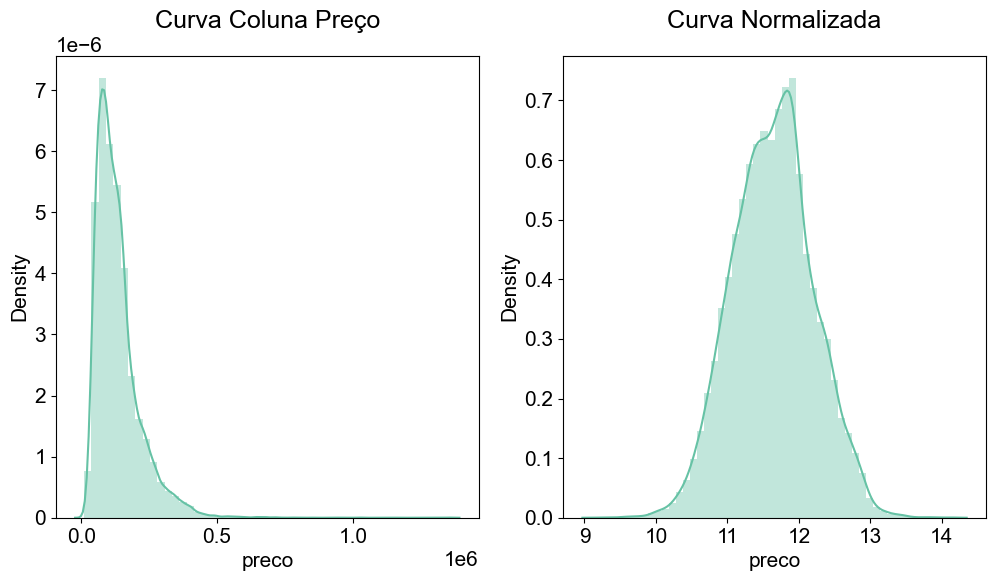

In [376]:
# Plots da var resposta (target)
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.distplot(df4['preco']);
plt.title('Curva Coluna Preço', pad=20)

plt.subplot(1,2,2)
sns.distplot(np.log(df4['preco']));
plt.title('Curva Normalizada', pad=20)

warnings.filterwarnings("ignore")

<p> O gráfico da esquerda, representa a curva do preço presente no dataset, ao aplicar o log para aproximar essa curva da normal, obtive o gráfico da direita, que agora se aproxima de uma curva normal/gaussiana.</p>
<p> É interessante a possibilidade da normalização da variável resposta (target), pois algoritmos de machine learning performam melhor com dados normalizados devido as suas premissas na qual foram construídos.</p>

### 4.1.2 Numerical Variable

In [377]:
df4.nunique().sort_values()

entrega_delivery               2
turbo                          2
revisoes_dentro_agenda         2
garantia_de_fabrica            2
veiculo_licenciado             2
ipva_pago                      2
revisoes_concessionaria        2
veiculo_unico_dono             2
blindado                       2
dono_aceita_troca              2
tipo_vendedor                  2
troca                          2
offroad                        2
num_portas                     3
anunciante                     3
categoria_marca                5
regiao                         5
ano_de_fab_bin                 6
combustivel                    6
cor                            7
tipo                           7
cambio                         7
num_fotos                     15
ano_modelo                    16
estado_vendedor               25
ano_de_fabricacao             35
marca                         39
cilindradas                   44
modelo                       440
cidade_vendedor              523
hodometro 

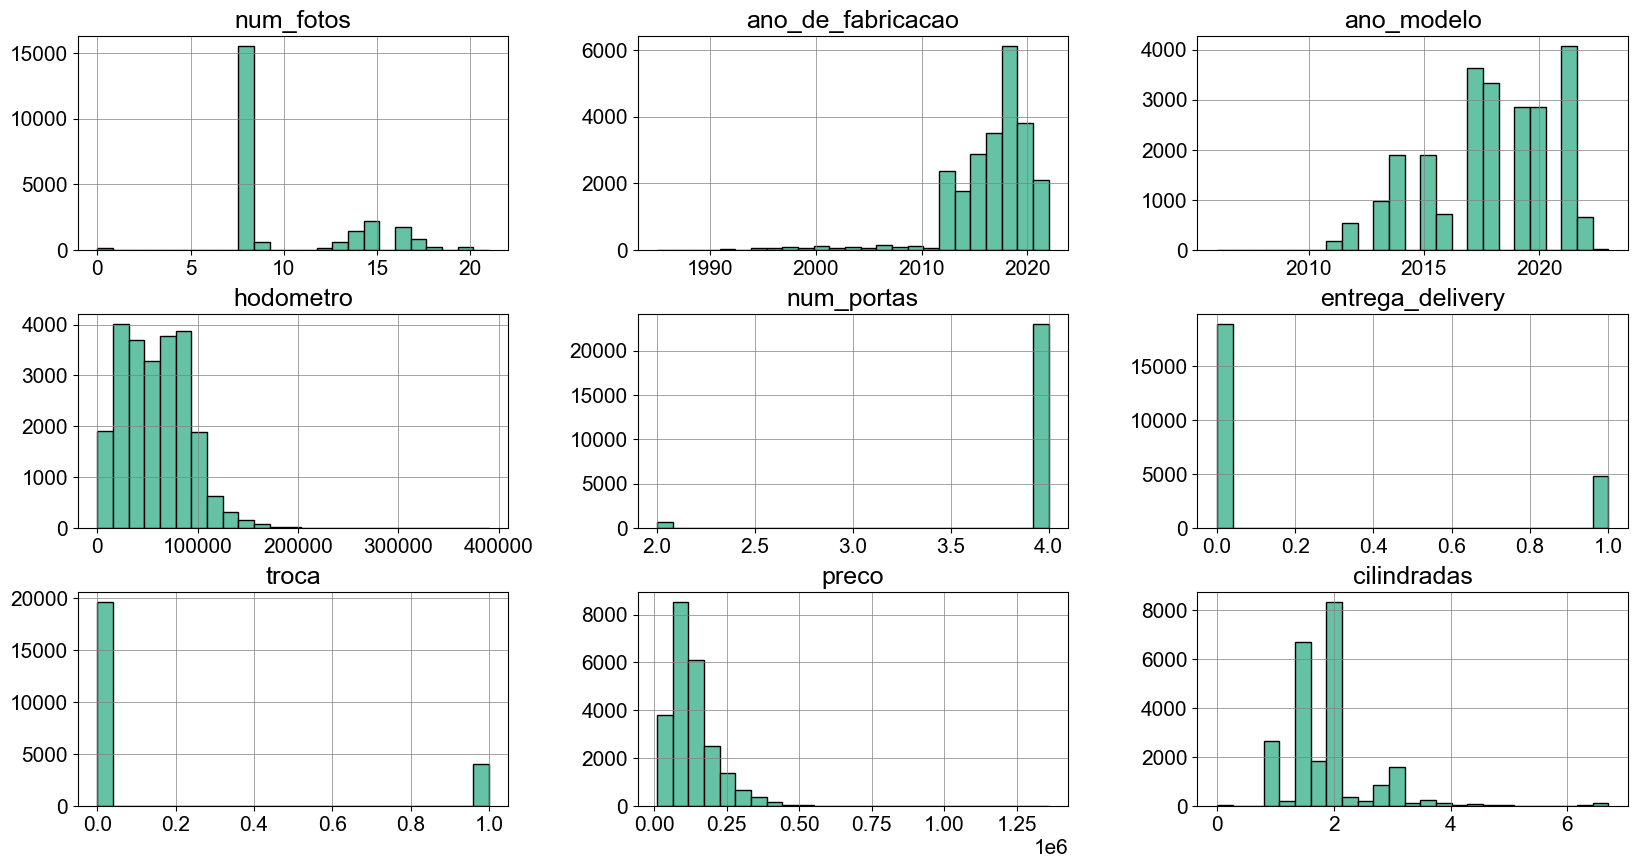

In [378]:
num_attributes.hist(bins=25, edgecolor='black');

É interessante observar que, variáveis com comportamento (altos e baixos), são importantes, pois quanto mais comportamento possuêm, mais explicativas 
do fenômeno elas são.

### 4.1.3 Categorical Variable

#### &#8226; Marcas

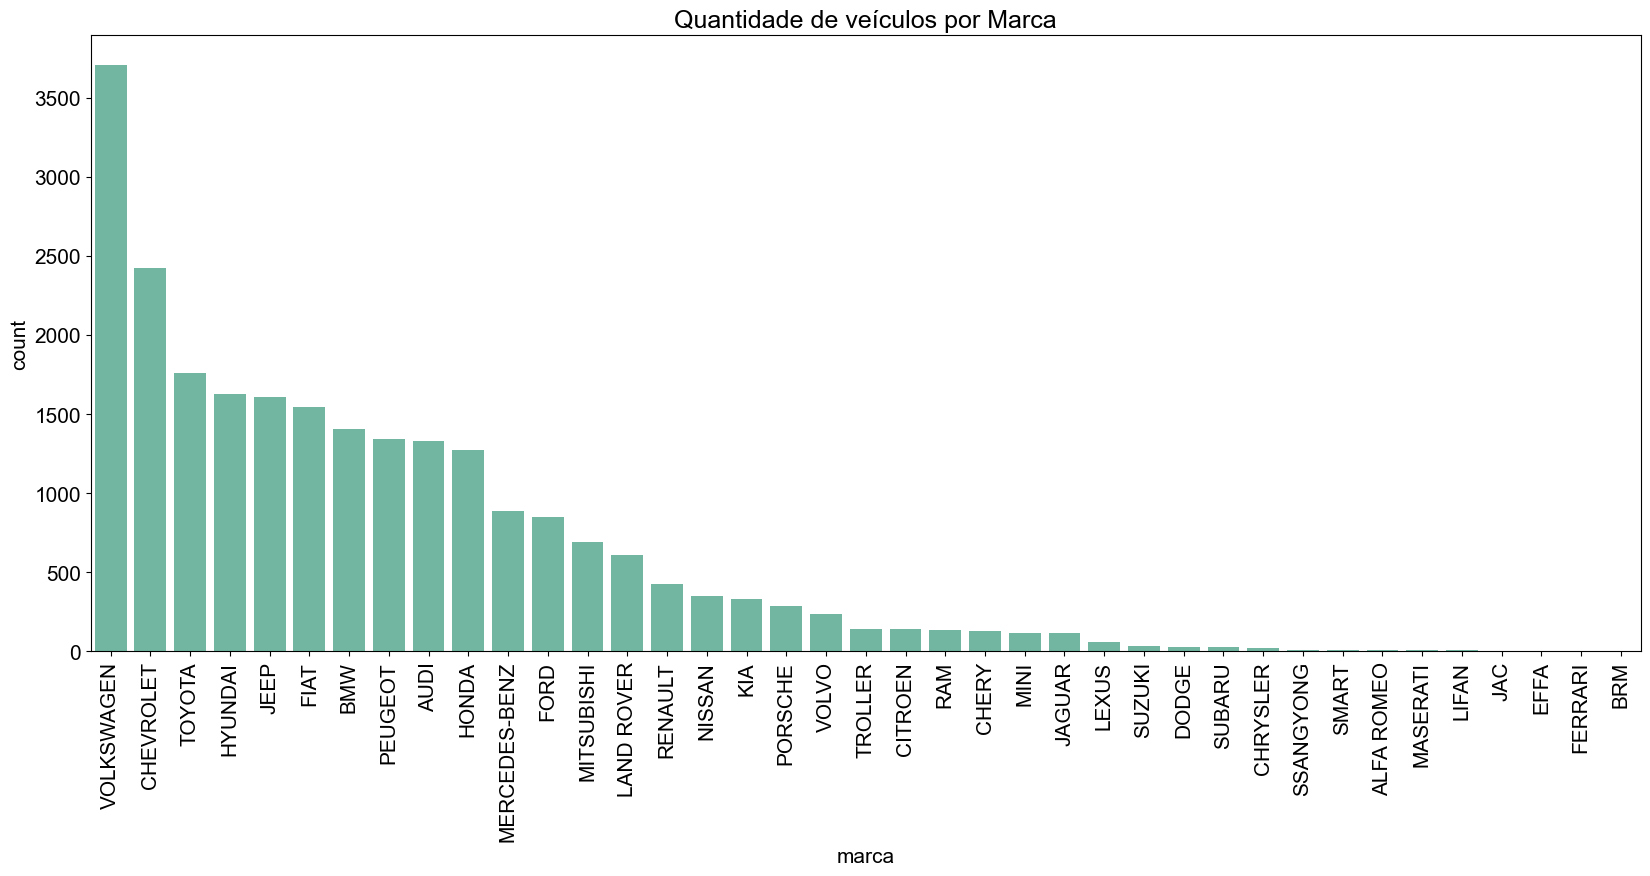

In [379]:
# MARCAS
plt.figure(figsize=(20,8))
ax = sns.countplot(x='marca', data=df4, order=df4['marca'].value_counts().sort_values(ascending=False).index)
ax.set_title('Quantidade de veículos por Marca')
plt.xticks(rotation=90)
plt.show()

#### &#8226; Categoria da Marca

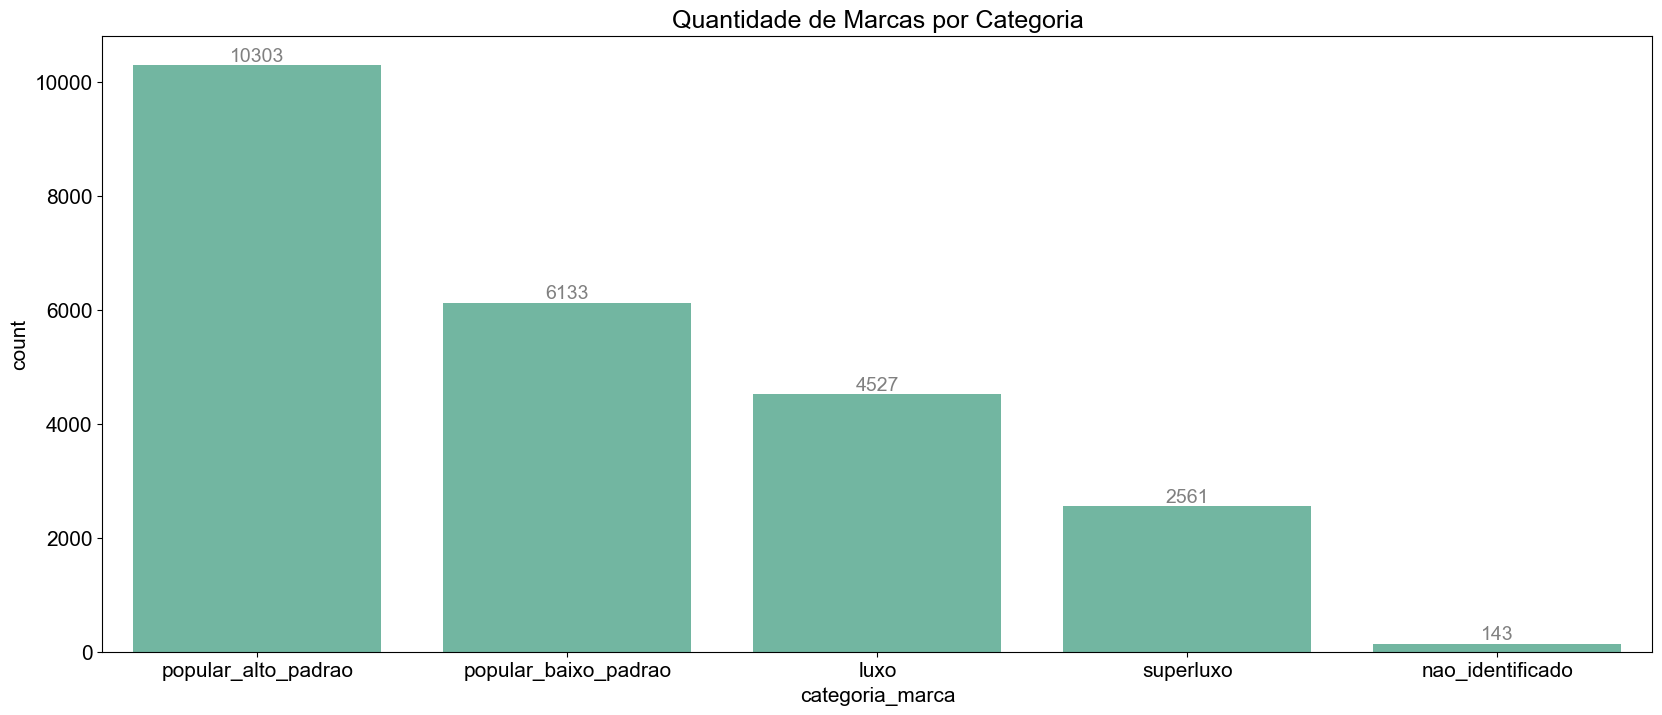

In [380]:
# Categoria da marca
plt.figure(figsize=(20,8))
ax = sns.countplot(x=df4['categoria_marca'], order=df4['categoria_marca'].value_counts().sort_values(ascending=False).index)
ax.set_title('Quantidade de Marcas por Categoria')
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=14, color='gray')
plt.show()

#### &#8226; Ano de fabricação

In [381]:
df4['ano_de_fab_bin'].value_counts().sort_index()

ano_de_fab_bin
<=2000      352
<=2005      298
<=2010      383
<=2015     5629
<=2020    14892
<=2025     2113
Name: count, dtype: int64

#### &#8226; Modelo

In [382]:
df4['modelo'].value_counts().head(10)

modelo
COMPASS    1191
2008       1150
TORO        733
Q3          706
COROLLA     705
ONIX        687
320i        656
AMAROK      600
GOLF        563
HILUX       514
Name: count, dtype: int64

#### &#8226; Tipo

In [383]:
df4['tipo'].value_counts().sort_values(ascending=False)

tipo
Sedan        13082
Hatchback     3967
Picape        3906
Util_Esp      2664
Cupe            22
Perua           22
Minivan          4
Name: count, dtype: int64

#### &#8226; Cor

In [384]:
df4['cor'].value_counts()

cor
Branco      16764
Preto        4200
Prata        1394
Cinza        1305
Dourado         2
Vermelho        1
Verde           1
Name: count, dtype: int64

#### &#8226; Combustível

In [385]:
df4['combustivel'].value_counts()

combustivel
FLEX        12974
GASOLINA     6170
DIESEL       3597
NI            658
HIBRIDO       211
ELÉTRICO       57
Name: count, dtype: int64

#### &#8226; Cambio

In [386]:
df4['cambio'].value_counts()

cambio
Automatica          18003
Manual               4043
CVT                  1420
Automatizada          108
Automatizada_DCT       39
Semi-auto              36
Auto_Sequencial        18
Name: count, dtype: int64

#### &#8226; Offroad

In [387]:
df4['offroad'].value_counts()

offroad
4x2    20479
4X4     3188
Name: count, dtype: int64

#### &#8226; Turbo

In [388]:
df4['turbo'].value_counts()

turbo
ASPIRADO    18022
TURBO        5645
Name: count, dtype: int64

#### &#8226; Blindado

In [389]:
df4['blindado'].value_counts()

blindado
Nao    23459
Sim      208
Name: count, dtype: int64

#### &#8226; Tipo de vendedor

In [390]:
df4['tipo_vendedor'].value_counts()

tipo_vendedor
PF    14308
PJ     9359
Name: count, dtype: int64

#### &#8226; Estado do vendedor	

In [391]:
df4['estado_vendedor'].value_counts()

estado_vendedor
SP    13140
PR     2008
RJ     2003
SC     1852
MG     1426
RS     1303
GO      645
BA      472
PE      251
AL      104
PB       91
RN       78
PA       58
CE       51
AM       36
MS       30
MT       27
AC       26
SE       18
TO       16
ES       16
MA        7
PI        4
RO        3
RR        2
Name: count, dtype: int64

#### &#8226; Anuciante	

In [392]:
df4['anunciante'].value_counts()
# Obs.: RV = Concessionárias

anunciante
PF    14366
PJ     7942
RV     1359
Name: count, dtype: int64

#### &#8226; Veículo único dono	

In [393]:
df4['veiculo_unico_dono'].value_counts()

veiculo_unico_dono
Nao    15320
Sim     8347
Name: count, dtype: int64

#### &#8226; Dono aceita troca	

In [394]:
df4['dono_aceita_troca'].value_counts()

dono_aceita_troca
Sim    17546
Nao     6121
Name: count, dtype: int64

#### &#8226; Revisões_concessionária	

In [395]:
df4['revisoes_concessionaria'].value_counts()

revisoes_concessionaria
Nao    16322
Sim     7345
Name: count, dtype: int64

#### &#8226; Revisões dentro da agenda

In [396]:
df4['revisoes_dentro_agenda'].value_counts()


revisoes_dentro_agenda
Nao    18934
Sim     4733
Name: count, dtype: int64

#### &#8226; Veículo licenciado

In [397]:
df4['veiculo_licenciado'].value_counts()

veiculo_licenciado
Sim    12745
Nao    10922
Name: count, dtype: int64

#### &#8226; IPVA pago	


In [398]:
df4['ipva_pago'].value_counts()

ipva_pago
Sim    15782
Nao     7885
Name: count, dtype: int64

#### &#8226; Garantia de Fábrica

In [399]:
df4['garantia_de_fabrica'].value_counts()

garantia_de_fabrica
Nao    20169
Sim     3498
Name: count, dtype: int64

## **4.2 Análise Bivariada**

### **Lista de Hipóteses**

**1.** Carros mais antigos possuem um preço menor.

**2.** Carros com maior valor de hodômetro possuem valores menores.

**3.** Carros na cor branca possuem preços maiores.

**4.** Carros com cambio manual e com valores maiores de hodometro, possuem preços menores.

**5.** Carros com garantia de fábrica possuem preços maiores.

**6.** Carros com revisões feitas em dia e nas concessionárias, possuem preços maiores.

**7.** Carros vendidos por pessoa física possuem preços menores.

**8.** Carros da região Sudeste possuem preços maiores em média.

**9.** Vendedores que aceitam troca possuem carros com preços menores.

**10.** Carros populares de baixo padrão são mais vendidos por pessoas físicas.

------------------

### **H1. Carros mais antigos possuem um preço menor.**
**True** - Carros mais antigos possuem preço menor que carros mais novos.

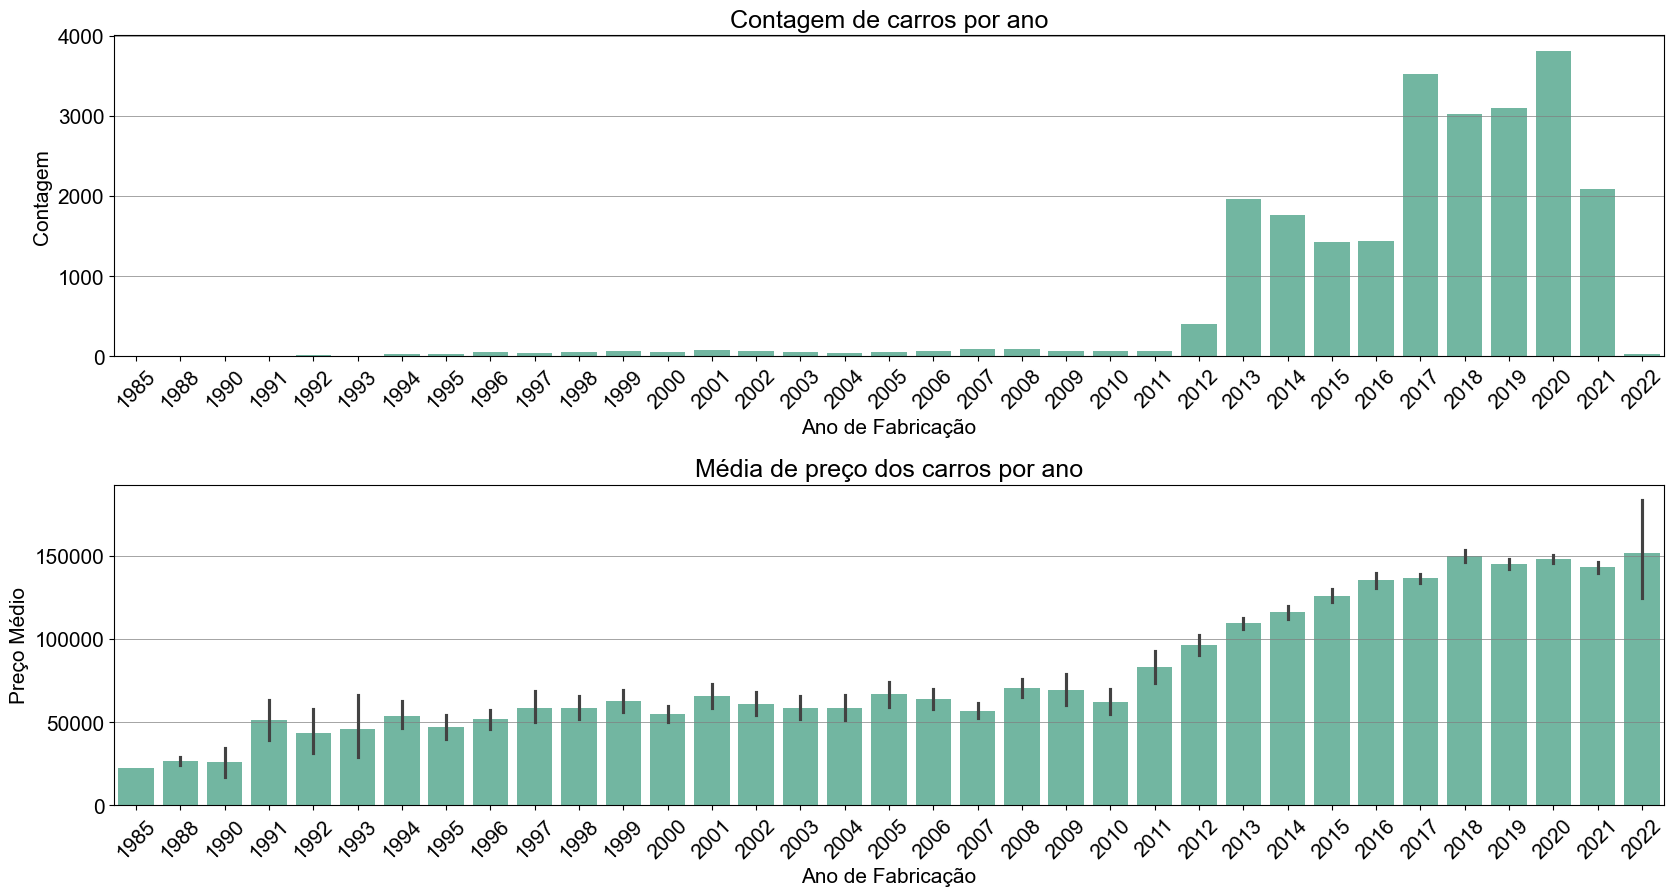

In [400]:
# Contagem de carros por ano
plt.subplot(2,1,1)
sns.countplot(data=df4, x='ano_de_fabricacao')
plt.title('Contagem de carros por ano')
plt.xlabel('Ano de Fabricação')
plt.ylabel('Contagem')
plt.grid(axis='y')
plt.xticks(rotation=45)

# Média de preço dos carros por ano
plt.subplot(2,1,2)
sns.barplot(data=df4, x='ano_de_fabricacao', y='preco')
plt.xlabel('Ano de Fabricação')
plt.ylabel('Preço Médio')
plt.title('Média de preço dos carros por ano')
plt.ticklabel_format(axis='y', style='plain')
plt.xticks(rotation=45)

# Geral configs plot
plt.grid(axis='y')
plt.subplots_adjust(hspace=0.4)
plt.show()

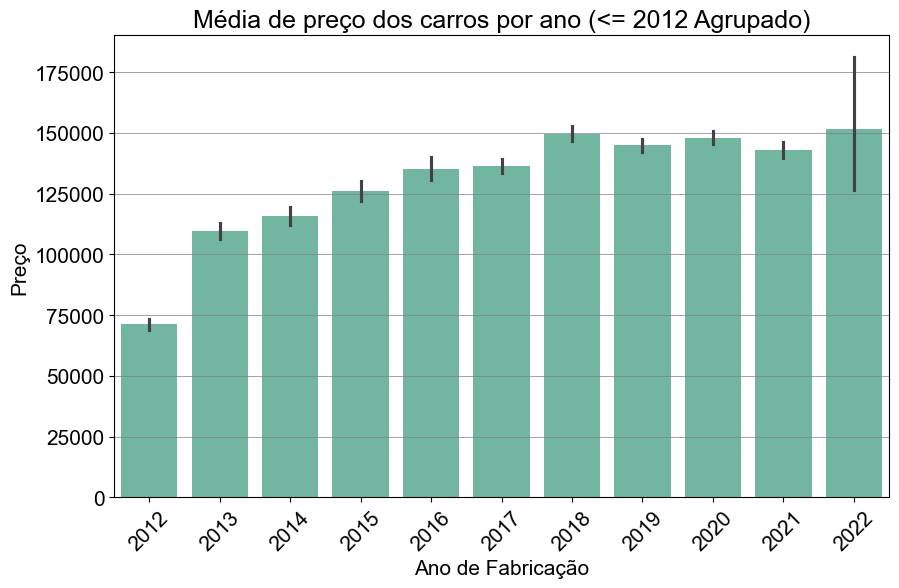

In [401]:
# Após analisar os dois gráficos acima, decidi agrupar todos os veículos antes de 2012 em 2012

plt.figure(figsize=(10,6))

# Agrupando anos antes de 2012
df4['ano_group'] = df4['ano_de_fabricacao'].apply(lambda x: 2012 if x <= 2012 else x)

# Média de preço dos carros por ano
sns.barplot(data=df4, x='ano_group', y='preco');
plt.xlabel('Ano de Fabricação')
plt.ylabel('Preço')
plt.title('Média de preço dos carros por ano (<= 2012 Agrupado)')
plt.ticklabel_format(axis='y', style='plain')
plt.xticks(rotation=45)

plt.grid(axis='y')
plt.subplots_adjust(hspace=0.4)
plt.show()

Após o agrupamento, devido a quantidade pequena veículos por ano antes de 2012, no gráfico acima, podemos observar que carros mais antigos, ou seja, por voltas de 5 anos atrás, possuem um preço menor.

---------------

### **H2. Carros com maior valor de hodômetro possuem valores menores.**
**True** - Carros com maiores valor de hodômetro possuem valores menores.

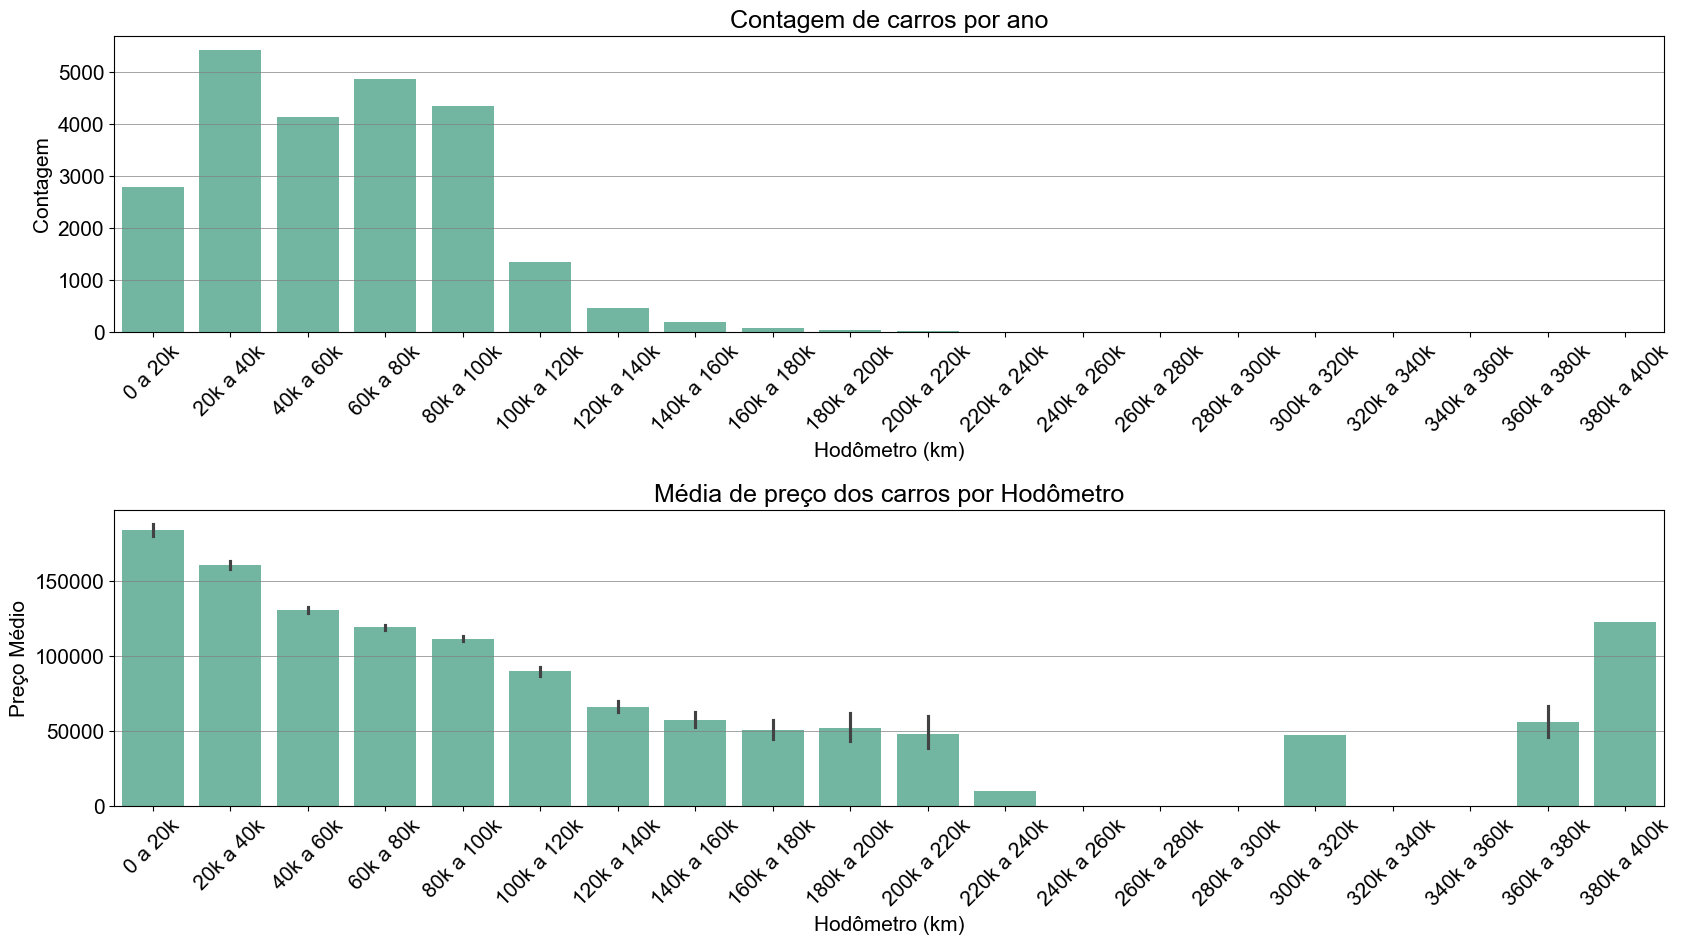

In [402]:
# Agrupando por hodometro (km)
bins = list(np.arange(0, 420000, 20000))
labels = ['0 a 20k', '20k a 40k', '40k a 60k', '60k a 80k', '80k a 100k', '100k a 120k', '120k a 140k', '140k a 160k', '160k a 180k', '180k a 200k', '200k a 220k', '220k a 240k', '240k a 260k', '260k a 280k', '280k a 300k', '300k a 320k', '320k a 340k', '340k a 360k', '360k a 380k', '380k a 400k']
df4['hodometro_bin'] = pd.cut(df4['hodometro'], bins=bins, labels=labels, right=False)

# Contagem de carros por ano
plt.subplot(2,1,1)
sns.countplot(data=df4, x='hodometro_bin')
plt.title('Contagem de carros por ano')
plt.xlabel('Hodômetro (km)')
plt.ylabel('Contagem')
plt.grid(axis='y')
plt.xticks(rotation=45)

# Média de preço dos carros por ano
plt.subplot(2,1,2)
sns.barplot(data=df4, x='hodometro_bin', y='preco')
plt.xlabel('Hodômetro (km)')
plt.ylabel('Preço Médio')
plt.title('Média de preço dos carros por Hodômetro')
plt.ticklabel_format(axis='y', style='plain')
plt.xticks(rotation=45)

# Geral configs plot
# plt.subplots_adjust(hspace=2, bottom=0.1)
plt.grid(axis='y')
plt.subplots_adjust(hspace=0.6)
plt.show()

Ignorando os valores finais, pois são valores atípicos, é nítido a queda do preço dos veículos à medida que o valor de hodômetro aumenta, ou seja, observa-se um comportamento inversamente proporcional entre essas variáveis.

---------------

### **H3. Carros na cor branca possuem preços maiores.**
**Falso** - Carros na cor CINZA possuem preços maiores.

In [403]:
cor_pq = df4.groupby('cor').agg({'preco': 'mean', 'id': 'count'}).sort_values('preco', ascending=False).reset_index()
cor_pq.columns = ['cor', 'preco_medio', 'quantidade']
cor_pq

,cor,preco_medio,quantidade
0,Cinza,197393.22,1305
1,Preto,137588.05,4200
2,Branco,129966.32,16764
3,Prata,96556.89,1394
4,Dourado,88728.36,2
5,Verde,60668.80,1
6,Vermelho,56046.78,1


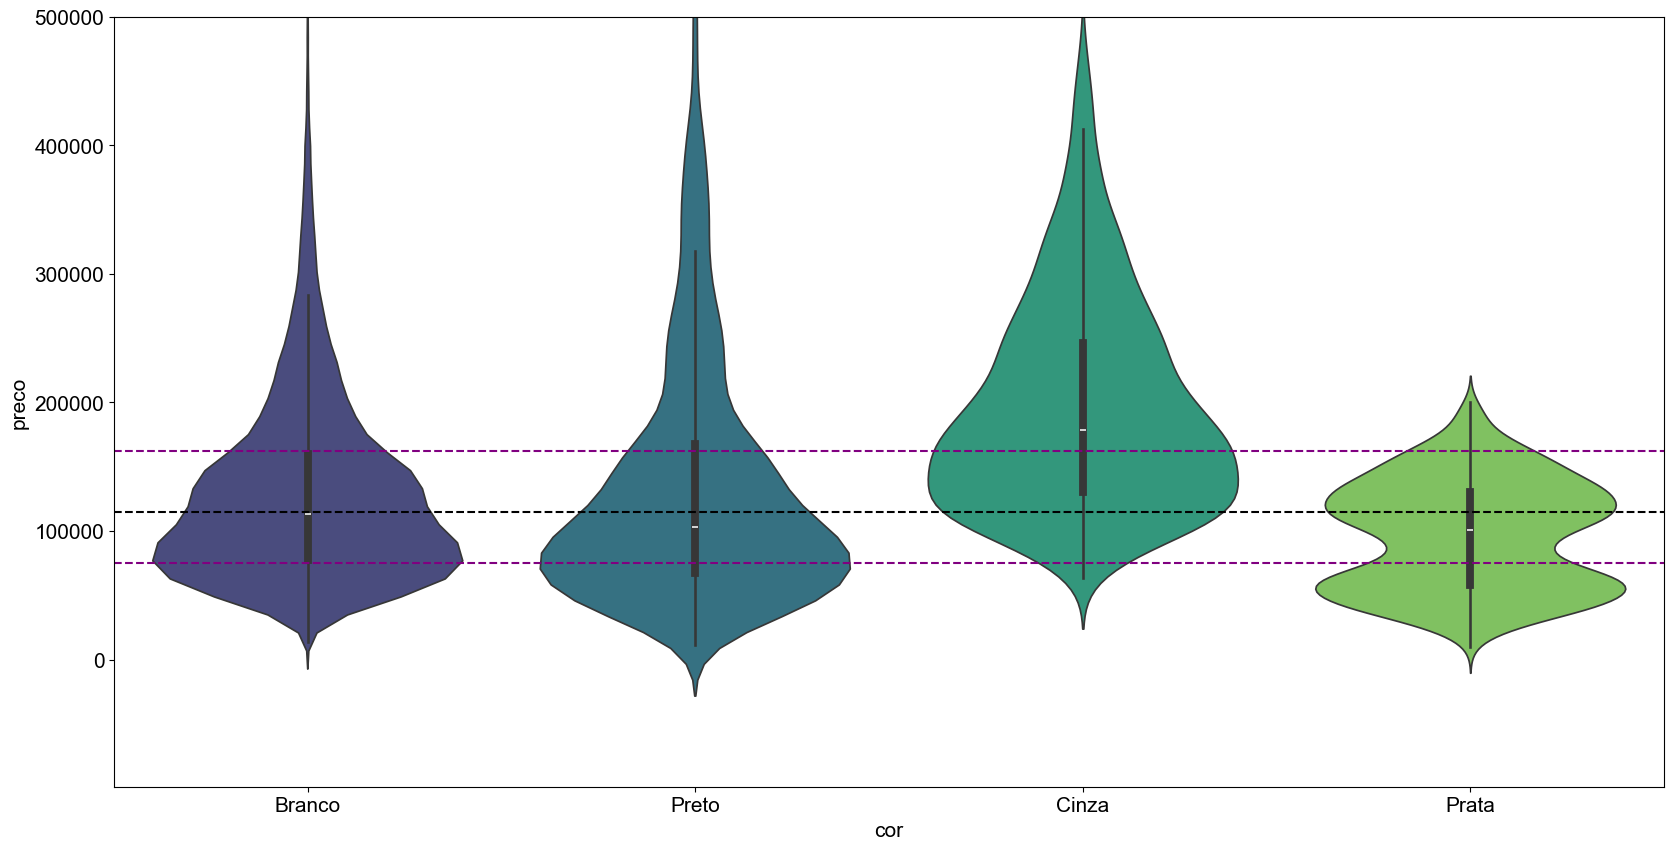

In [404]:
# Removendo cores por quantidade insignificante
cores_para_excluir = ['Vermelho', 'Dourado', 'Verde']
aux = df4[~df4['cor'].isin(cores_para_excluir)]

# Plot 
ax = sns.violinplot(data=aux, x='cor', y='preco', palette='viridis')
plt.ticklabel_format(style='plain', axis='y')
plt.axhline(y=75000, color='purple', linestyle='--')
plt.axhline(y=115000, color='black', linestyle='--')
plt.axhline(y=162000, color='purple', linestyle='--')
ax.set_ylim(ymax=500000)
plt.show()

Nota-se que veículos de cor cinza é que possuem preços maiores. A mediana (Q2) da cor Branco, está abaixo de Q1 da cor cinza, ou seja, 75% dos veículos de cor cinza, possuem preços maiores que 50% dos veículos de cor branca. A cor cinza também se sobrepõe as demais cores.

---------------

### **H4. Carros com cambio manual e com valores maiores de hodômetro, possuem preços menores.**
**True** - Carros com cambio manual e com valores maiores de hodômetro, possuem preços MENORES!

In [405]:
df4['cambio'].value_counts()

cambio
Automatica          18003
Manual               4043
CVT                  1420
Automatizada          108
Automatizada_DCT       39
Semi-auto              36
Auto_Sequencial        18
Name: count, dtype: int64

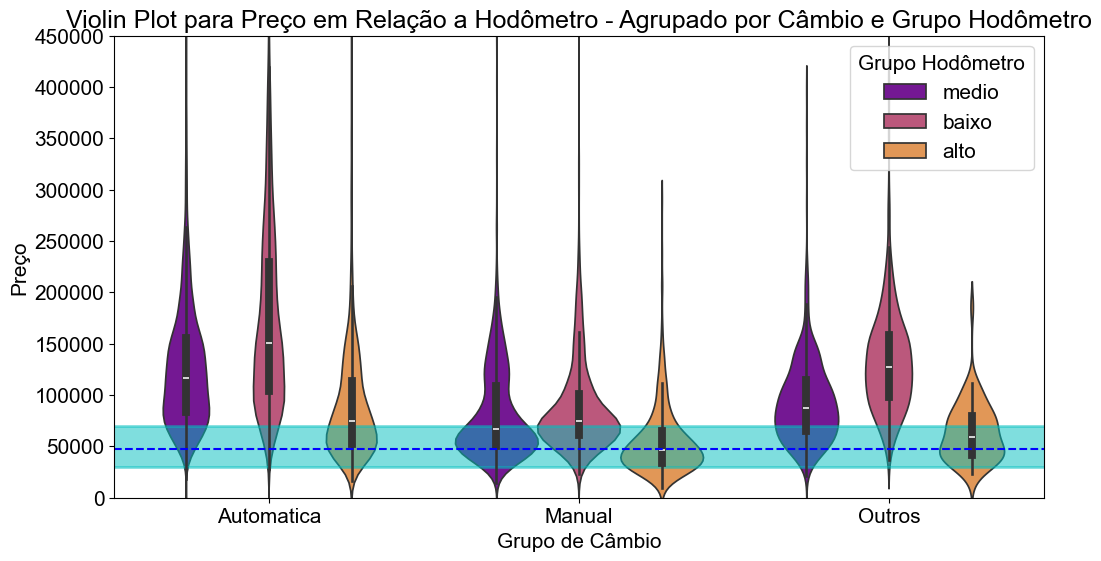

In [406]:
# Criando grupos para o cambio
cambio_outros = ['CVT', 'Automatizada', 'Automatizada_DCT', 'Semi-auto', 'Auto_Sequencial']
df4['cambio_grupo'] = df4['cambio'].apply(lambda x: 'Outros' if x in cambio_outros else x)

# Criando grupo de hodometro km baixo, médio, alto
df4['hodo_grupo'] = df4['hodometro'].apply(lambda x: 'baixo' if x <= 50000 else 'alto' if x >= 100000 else 'medio')

# Plotando Violinos por grupos
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='cambio_grupo', y='preco', hue='hodo_grupo', data=df4, palette='plasma')
plt.title('Violin Plot para Preço em Relação a Hodômetro - Agrupado por Câmbio e Grupo Hodômetro')
plt.xlabel('Grupo de Câmbio')
plt.ylabel('Preço')
plt.legend(title='Grupo Hodômetro')
plt.ticklabel_format(axis='y', style='plain')
plt.axhline(y=47000, color='blue', linestyle='--')
rect = patches.Rectangle((-1, 30000), 5, 40000, linewidth=2, edgecolor='c', facecolor='c', alpha=0.5)
ax.add_patch(rect)
# Apenas para facilitar a visualização do corpo dos violinos
ax.set_ylim(0, 450000)
plt.show()

É notável que o grupo de veículos com câmbio manual e hodômetro alto, apresentam os preços mais baixos, pois ao analisar as medianas dos violinos, esse grupo exibe o menor valor. Além disso, cerca de 50% dos veículos nessa categoria verificada (câmbio manual e hodômetro alto), possui preços inferiores a 75% dos veículos dos demais violinos.

---------------

### **H5. Carros com garantia de fábrica possuem preços maiores.**
**True** - Carros com garantia de fábrica possuem preços MAIORES.

In [407]:
gf_preco = df4.groupby('garantia_de_fabrica').agg({'id': 'count', 'preco': ['mean', np.std]}).sort_values(('preco', 'mean'), ascending=False).reset_index()
gf_preco.columns = ['garantia_de_fabrica', 'quantidade', 'media_preco', 'std_preco']
gf_preco

,garantia_de_fabrica,quantidade,media_preco,std_preco
0,Sim,3498,169218.79,84799.75
1,Nao,20169,126788.16,80047.48


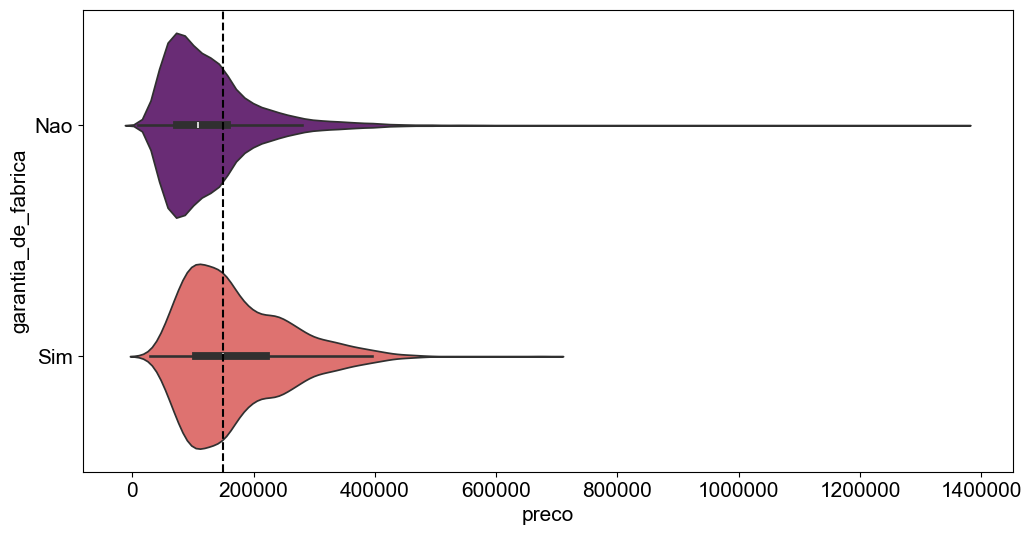

In [408]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df4, x='preco', y='garantia_de_fabrica', palette='magma')
plt.axvline(x=150000, color='black', linestyle='--')
plt.ticklabel_format(style='plain', axis='x')

---------------

### **H6. Carros com revisões feitas em dia e nas concessionárias, possuem preços maiores.**
**True** - Carros com revisões feitas em dia e nas concessionárias, possuem preços MAIORES. 

FALTA VER SE ESTÁ EM DIA

In [409]:
rev_conc = df4.groupby('revisoes_concessionaria').agg({'id': 'count', 'preco': ['mean', np.std]}).sort_values(('preco', 'mean'), ascending=False).reset_index()
rev_conc.columns = ['revisoes_concessionaria', 'quantidade', 'media_preco', 'std_preco']
rev_conc

,revisoes_concessionaria,quantidade,media_preco,std_preco
0,Sim,7345,155014.55,88780.47
1,Nao,16322,123179.51,76982.53


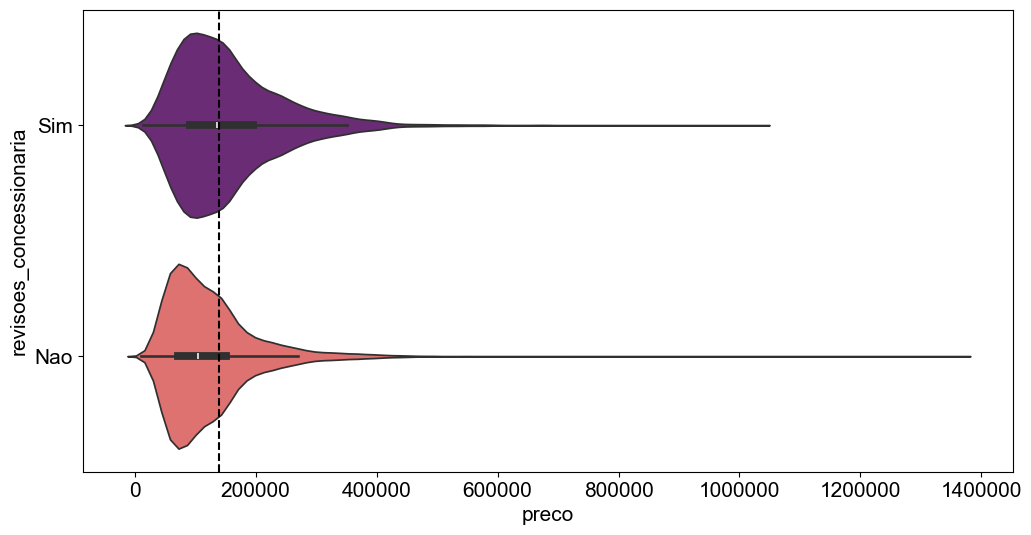

In [410]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df4, x='preco', y='revisoes_concessionaria', palette='magma')
plt.axvline(x=140000, color='black', linestyle='--')
plt.ticklabel_format(style='plain', axis='x')

---------------

### **H7. Carros vendidos por pessoa física possuem preços menores.**
**False** - Carros vendidos por pessoa física possuem preços MAIORES.

In [411]:
tipo_vend = df4.groupby('tipo_vendedor').agg({'id': 'count', 'preco': ['mean', np.std]}).sort_values(('preco', 'mean'), ascending=False).reset_index()
tipo_vend.columns = ['tipo_vendedor', 'quantidade', 'media_preco', 'std_preco']
tipo_vend

,tipo_vendedor,quantidade,media_preco,std_preco
0,PF,14308,139087.25,84790.81
1,PJ,9359,123844.15,77058.31


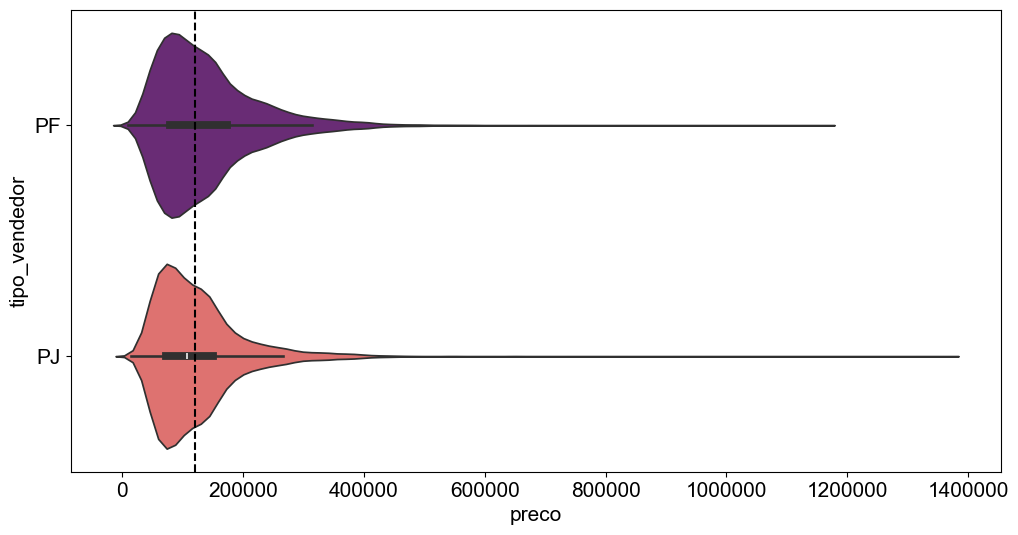

In [412]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df4, x='preco', y='tipo_vendedor', palette='magma')
plt.axvline(x=120000, color='black', linestyle='--')
plt.ticklabel_format(style='plain', axis='x')

---------------

### **H8. Carros da região Sudeste possuem preços maiores em média.**
**False** - Carros da região Centro Oeste possuem os maiores preços em média.

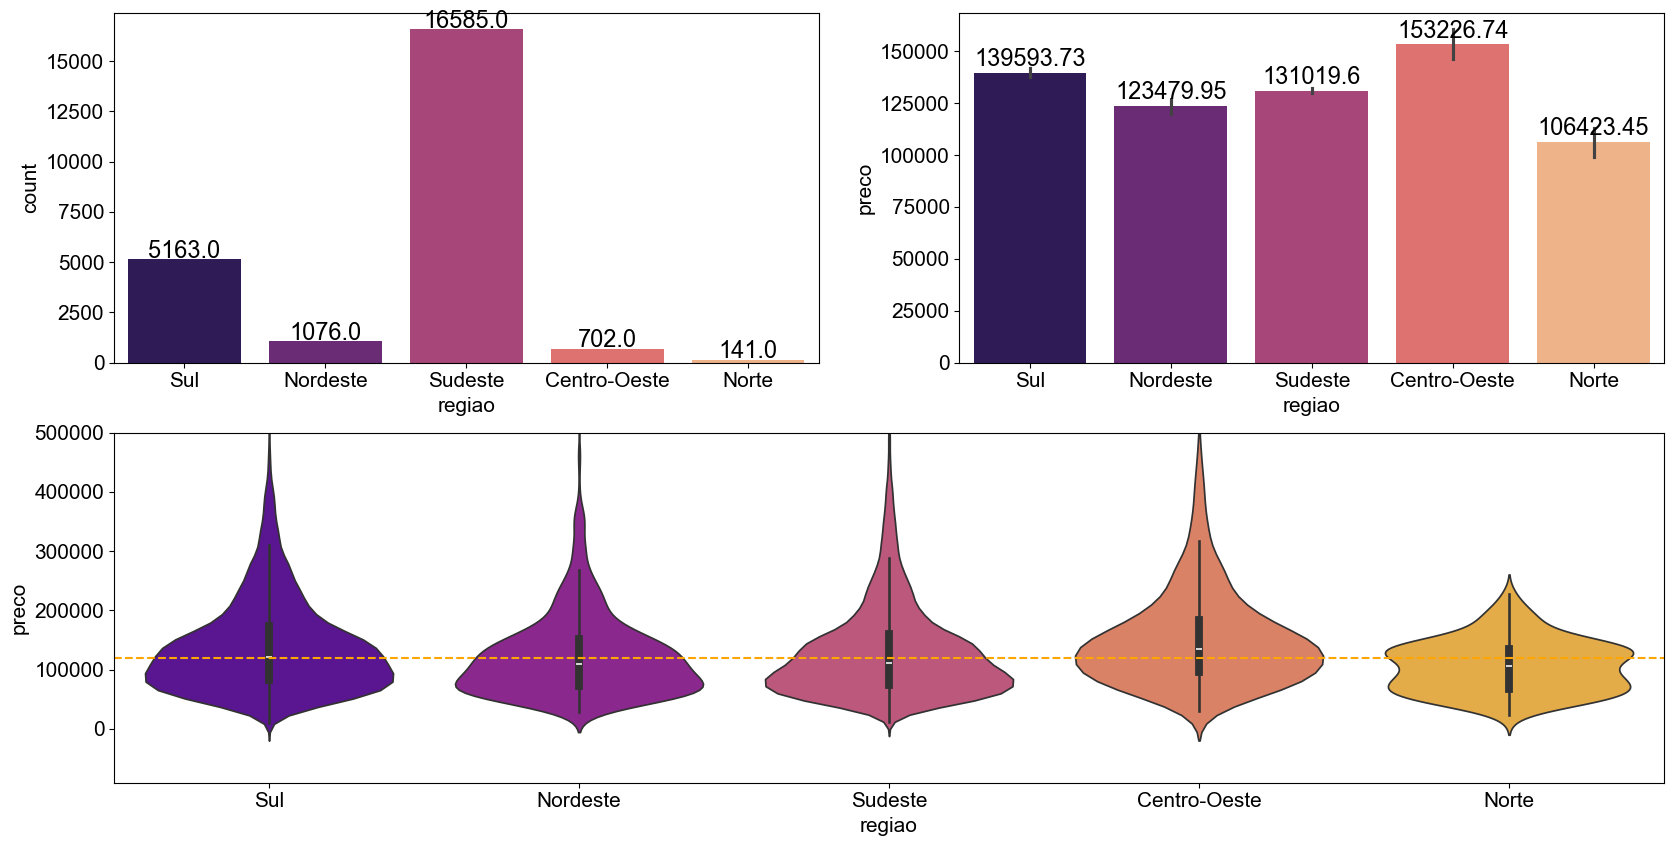

In [413]:
# Criando uma nova coluna 'regiao'
df4['regiao'] = df4['estado_vendedor'].apply(mapear_regiao)

# Criando grid para acomodar os plots
grid = gridspec.GridSpec(2,2)

# Contagem de veículos por região
plt.subplot(grid[0,0])
plot1 = sns.countplot(data=df4, x='regiao', palette='magma')
for i in plot1.patches:
    plot1.annotate(i.get_height(),
                  (i.get_x() + i.get_width() / 2, i.get_height()),
                  ha='center',
                  va='baseline',
                  fontsize=17,
                  color='black',
                  xytext=(0, 1),
                  textcoords='offset points')

# Região x Preço médio.
plt.subplot(grid[0,1])
plot2= sns.barplot(data=df4,x='regiao', y='preco', palette='magma')
for i in plot2.patches:
    plot2.annotate(round(i.get_height(), 2),
                  (i.get_x() + i.get_width() / 2, i.get_height()),
                  ha='center',
                  va='baseline',
                  fontsize=17,
                  color='black',
                  xytext=(0, 5),
                  textcoords='offset points')
    
plt.subplot(grid[1,:])
ax = sns.violinplot(data=df4, x='regiao', y='preco', palette='plasma')
# Zoom para poder "remover" os outliers e melhorar a visão do corpo do violino
ax.set_ylim(ymax=500000)
plt.axhline(y=120000, color='orange', linestyle='--')
plt.ticklabel_format(style='plain', axis='y')
plt.subplots_adjust(hspace=0.2)

Observando os gráficos, vê-se que a região Centro Oeste possui o maior valor médio e seu intervalo de confiança está razoável em relação as outras regiões. Além disso, a mediana (Q2) do Centro Oeste também é a maior entre os violinos.

---------------

### **H9. Vendedores que aceitam troca possuem carros com preços menores.**
**False** - Vendedores que aceitam troca possuem carros com preços MAIORES.

In [414]:
aceita_troca = df4.groupby('dono_aceita_troca').agg({'id': 'count', 'preco': ['mean', np.std]}).sort_values(('preco', 'mean'), ascending=False).reset_index()
aceita_troca.columns = ['dono_aceita_troca', 'quantidade', 'media_preco', 'std_preco']
aceita_troca

,dono_aceita_troca,quantidade,media_preco,std_preco
0,Sim,17546,136993.31,86285.31
1,Nao,6121,121782.91,67720.98


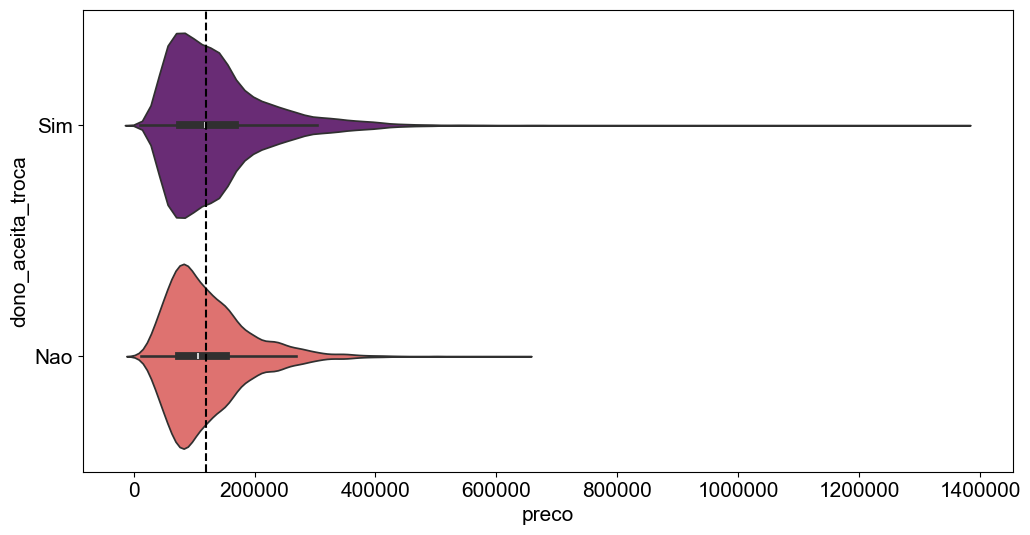

In [415]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df4, x='preco', y='dono_aceita_troca', palette='magma')
plt.axvline(x=120000, color='black', linestyle='--')
plt.ticklabel_format(style='plain', axis='x')

### **H10. Carros populares de baixo padrão são mais vendidos por pessoas físicas.**
**False** - Carros populares de ALTO padrão são mais vendidos por pessoa física.

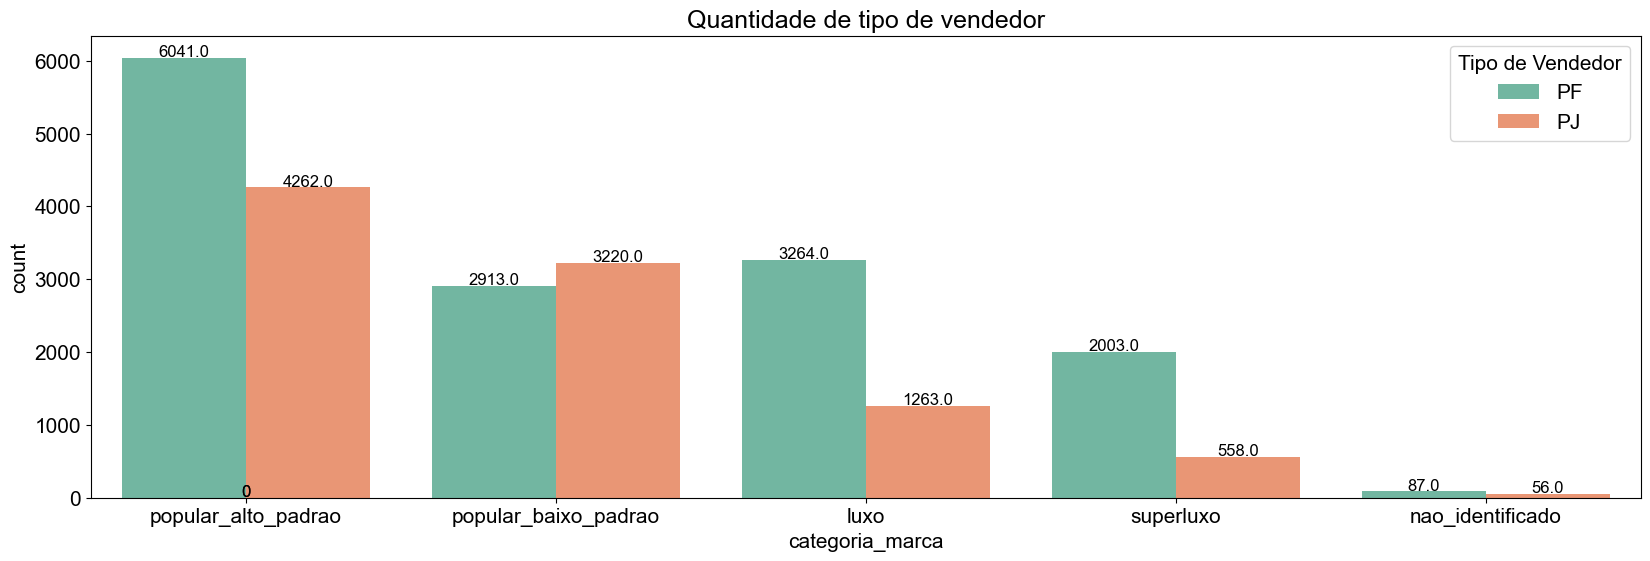

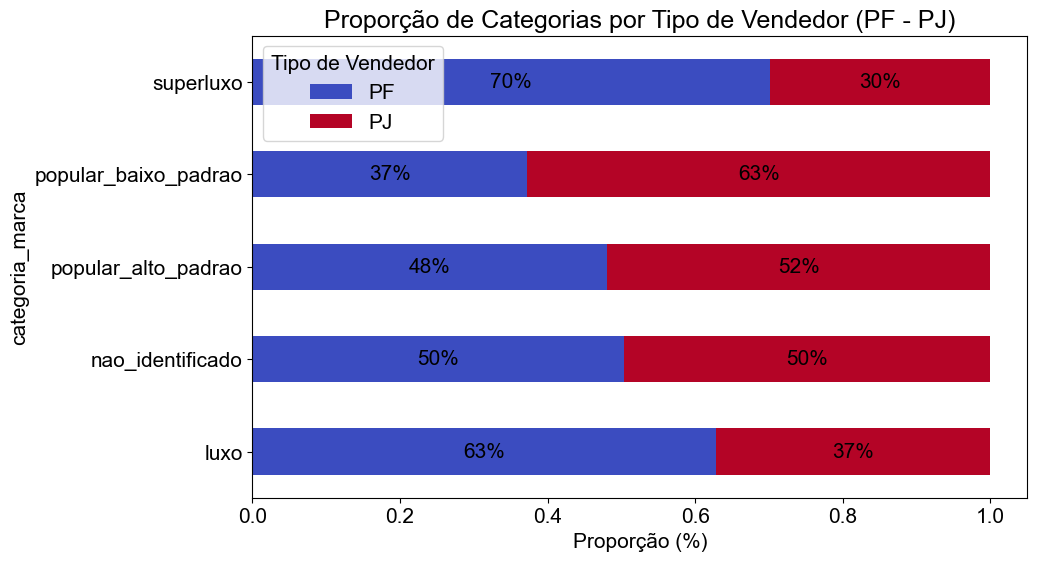

In [416]:
plt.figure(figsize=(20, 6))

# Countplot Tipo de vendedor
aux = sns.countplot(data=df4, x='categoria_marca', hue='tipo_vendedor')
for i in aux.patches:
    aux.annotate(i.get_height(),
                  (i.get_x() + i.get_width() / 2, i.get_height()),
                  ha='center',
                  va='baseline',
                  fontsize=12,
                  color='black',
                  xytext=(0, 1),
                  textcoords='offset points')
plt.title('Quantidade de tipo de vendedor')
plt.legend(title='Tipo de Vendedor', loc='upper right')


# Plot Proporção categorias
# Filtrando por tipo de vendedor PF
aux_pf = df4[df4['tipo_vendedor'] == 'PF']
aux_pf = aux_pf['categoria_marca'].value_counts(normalize=True)
# Filtrando por tipo de vendedor PJ
aux_pj = df4[df4['tipo_vendedor'] == 'PJ']
aux_pj = aux_pj['categoria_marca'].value_counts(normalize=True)
# Criando um DataFrame para unir as proporções
df_proporcoes = pd.DataFrame({'PF': aux_pf, 'PJ': aux_pj}).fillna(0)
# Normalizando as proporções para ter soma igual a 1
df_proporcoes = df_proporcoes.div(df_proporcoes.sum(axis=1), axis=0)
# Plot
ax = df_proporcoes.plot(kind='barh', stacked=True, figsize=(10, 6), colormap='coolwarm')
# Adicionando valores das porcentagens ao lado de cada barra
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_x(), p.get_y()
    ax.annotate(f'{width:.0%}', (x + width/2, y + height/2), ha='center', va='center')
plt.title('Proporção de Categorias por Tipo de Vendedor (PF - PJ)')
plt.xlabel('Proporção (%)')
plt.legend(title='Tipo de Vendedor', loc='upper left')
plt.show()

Como base em ambos os gráficos, nota-se que a categoria popular baixo padrão é mais vendida por pessoa jurídica (PJ).
A maior parte do dataset é composta por vendedores pessoa física (PF).

-----

## **4.3 Análise Multivariada**

### 4.3.1 Numerical Attributes

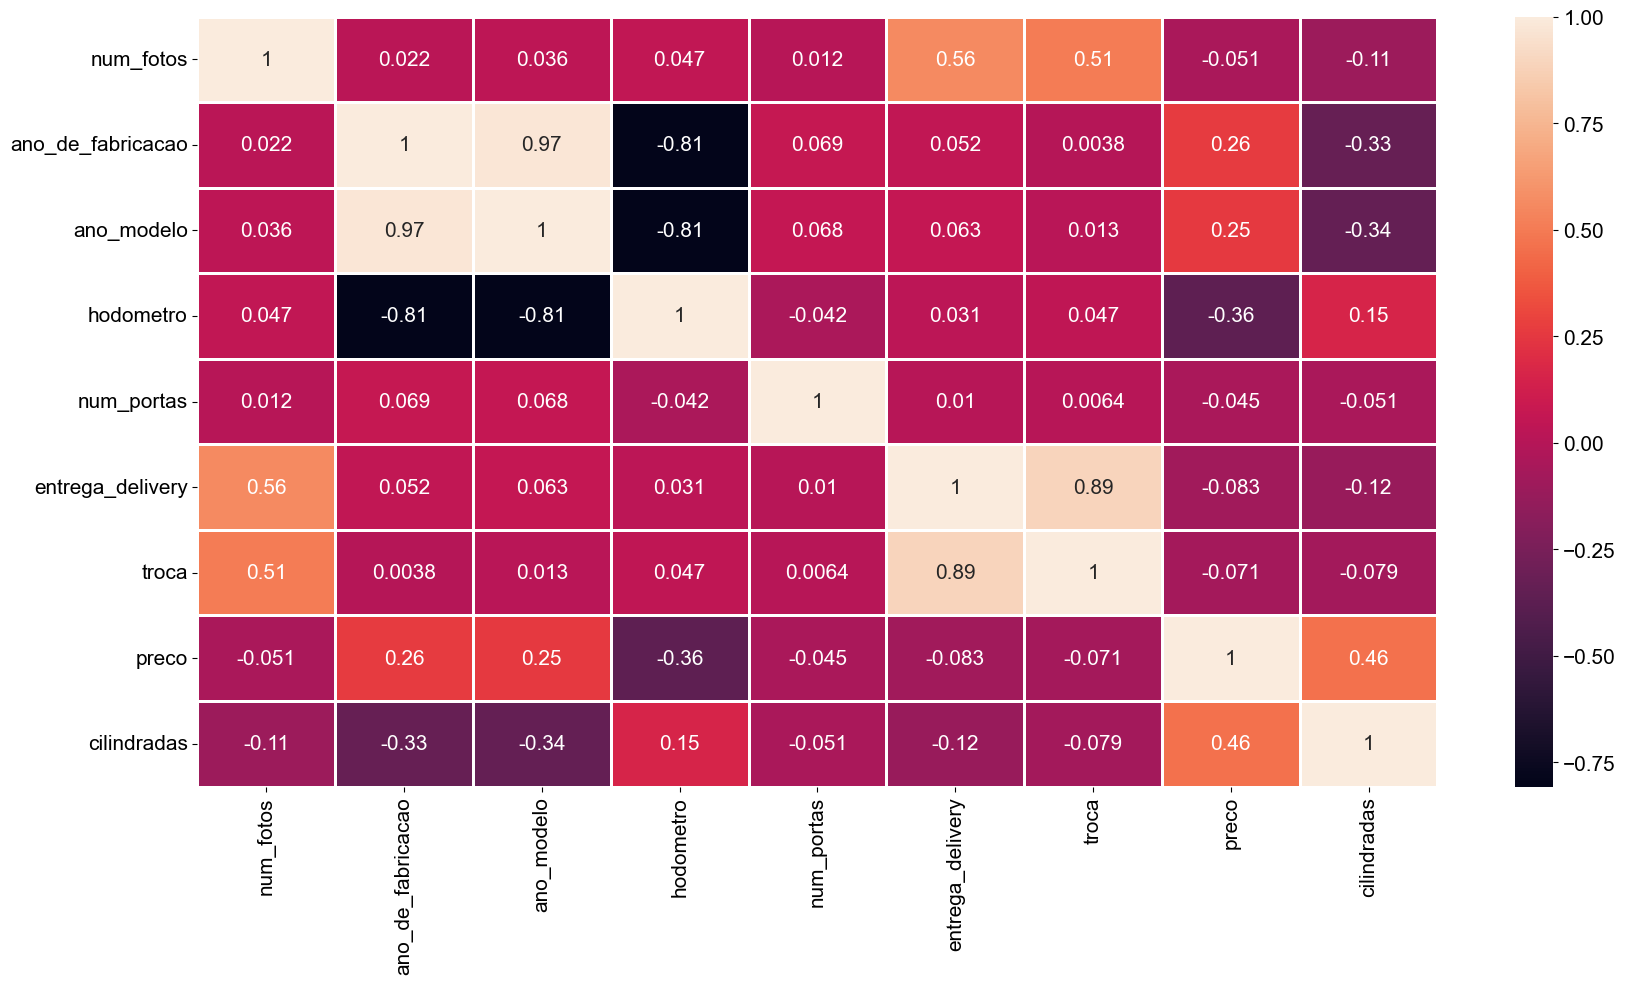

In [417]:
# Matriz de correlação multivariada
plt.figure(figsize=(20,10))
correlation = num_attributes.corr(method='spearman')
sns.heatmap(correlation, annot=True, linewidths=2);

Podemos ver aqui a correlação negativa forte entre hodômetro e os anos de fabricação e modelo, ou seja, quanto menor o ano, maior será o valor do hodômetro.

É sempre válido lembrar que correlação não implica causalidade.

### 4.3.2 Categorical Attributes

In [418]:
# # Cramers V
# cat = cat_attributes.drop(columns='id')
# cat_colunas = cat.columns
# sns.heatmap(call_cramerv(cat_colunas, df4), annot=True, fmt=".2f", cmap="viridis", linewidths=2)